In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt 

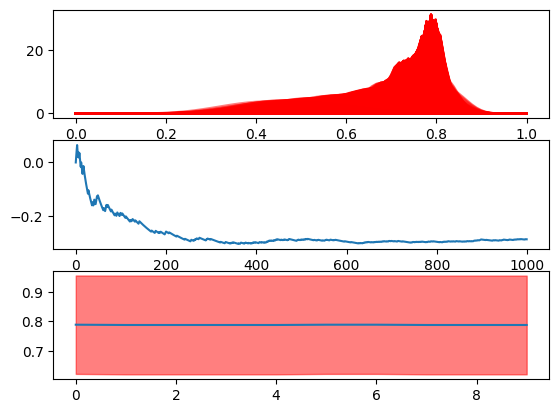

In [2]:
# Model true distribution
mu = 0.8 
N = 1000 

X = np.random.binomial(1, mu, N)
mu_test = np.linspace(0, 1, 100)

# Model prior distribution 
a = 10
b = 10 
prior_mean = a / (a + b)
prior_var = prior_mean * (1 - prior_mean)

prior = beta.pdf(mu_test, a, b)

fig, ax = plt.subplots(3, 1)
prim_ax = ax[0]
sec_ax = ax[1]
third_ax = ax[2]

prim_ax.plot(mu_test, prior, color='green') 
prim_ax.fill_between(mu_test, prior, color='green', alpha=0.3)

def posterior(X, a, b): 
    a_n = a + X.sum()
    b_n = b + (X.shape[0] - X.sum())

    posterior_mean = a_n / (a_n + b_n)
    posterior_variance = posterior_mean * (1 - posterior_mean)

    return beta.pdf(mu_test, a_n, b_n), posterior_mean, posterior_variance

n_trials = 10
x_trials = np.zeros((10, 2)) 
for trial in range(0, n_trials): 
    index = np.random.permutation(X.shape[0])

    y_dist = np.zeros(X.shape)
    for i in range(0, X.shape[0]):
        y, y_mean, y_var = posterior(X[index][:i], a, b)
        prim_ax.plot(mu_test, y, color='red', alpha=0.5)
        
        y_dist[i] = prior_mean - y_mean

    x_trials[trial, 0] = y_mean
    x_trials[trial, 1] = y_var
    
n =  range(X.shape[0])
sec_ax.plot(n, y_dist) 

third_ax.plot(range(x_trials.shape[0]), x_trials[:,0]) 
third_ax.fill_between(range(x_trials.shape[0]), x_trials[:,0] - x_trials[:,1], x_trials[:,0] + x_trials[:,1], alpha=0.5, color='red')

Posterior mean shape: (100,)
Posterior covariance shape: (100, 100)


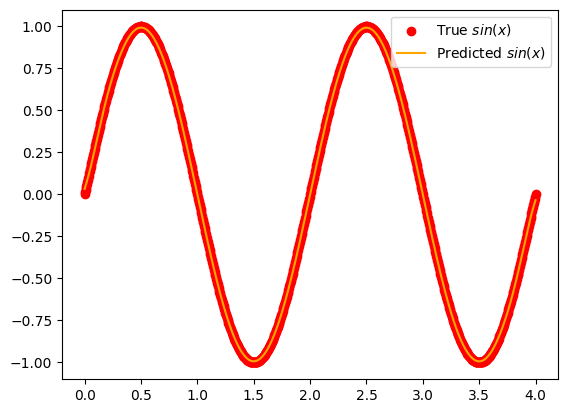

In [514]:
import numpy as np
from scipy.stats import multivariate_normal

# Define Gaussian basis function
def gaussian_basis_function_two(x, b, s):
    return np.exp(-(x - b)**2 / (2 * s ** 2))

# Centers for the Gaussian basis functions
centers = np.linspace(-5, 5, 100)
s = 0.1

# Transform input data using Gaussian basis functions
def transform_X(X, centers, s):
    trans_x = np.array([gaussian_basis_function_two(X, b, s) for b in centers]).T
    return trans_x

# Setup the input data
n_xs = 1001
X = np.linspace(0, 4, n_xs)

# Add some noise to the data
e = np.random.normal(0, 0.03, size=X.shape[0])

# Transform the input X using Gaussian basis functions
X_transformed = transform_X(X, centers, s)
n_features = X_transformed.shape[1]

# Generate the true weights and target data (with noise)
w = np.random.normal(0, 1, size=n_features)
y = X_transformed @ w + e

# True function for comparison
y_true = np.sin(X * np.pi)

# Prior setup
w_0 = np.zeros(shape=n_features)  # Prior mean
tau = 1 * np.eye(n_features)       # Prior covariance (identity matrix)
inv_tau = np.linalg.inv(tau)       # Inverse of prior covariance

# Likelihood noise variance
sigma_noise = 1.0

# Compute the posterior covariance
sigma_post = np.linalg.inv(inv_tau + (1 / sigma_noise ** 2) * X_transformed.T @ X_transformed)

# Compute the posterior mean
mean_post = sigma_post @ (inv_tau @ w_0 + (1 / sigma_noise ** 2) * X_transformed.T @ y_true)

# Check the shapes of the posterior mean and covariance
print("Posterior mean shape:", mean_post.shape)
print("Posterior covariance shape:", sigma_post.shape)

# Make predictions with the posterior mean
y_pred = X_transformed @ mean_post

# Plot the results
plt.scatter(X, y_true, color='red', label='True $sin(x)$')
plt.plot(X, y_pred, color='orange', label='Predicted $sin(x)$')
plt.legend()
plt.show()


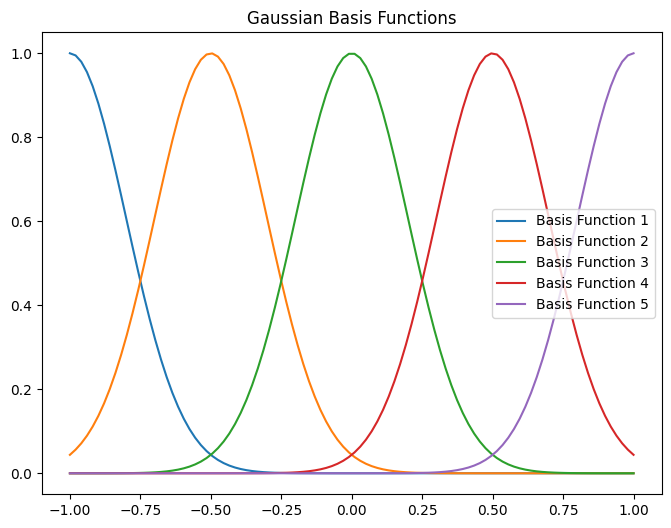

In [521]:
import numpy as np
import matplotlib.pyplot as plt

# Define Gaussian basis function
def gaussian_basis_function(x, center, width):
    return np.exp(-(x - center)**2 / (2 * width ** 2))

# Create input data
X = np.linspace(-1, 1, 100)
y_true = np.sin(X * np.pi)

# Define centers and width for the Gaussian basis functions
centers = np.linspace(-1, 1, 5)
width = 0.2

# Apply Gaussian basis functions
X_transformed = np.array([gaussian_basis_function(X, c, width) for c in centers]).T

# Visualize the basis functions
plt.figure(figsize=(8, 6))
for i in range(X_transformed.shape[1]):
    plt.plot(X, X_transformed[:, i], label=f'Basis Function {i+1}')
plt.legend()
plt.title('Gaussian Basis Functions')
plt.show()


In [552]:
point = 10 
center = 20 
dist = (point-center)**2
print(f'dist {dist}')

s = 10
width_scale = 2*s**2
print(f'width scale {width_scale}')

val = dist / width_scale
print(f'val {val}')

np.exp(-val)

dist 100
width scale 200
val 0.5


np.float64(0.6065306597126334)

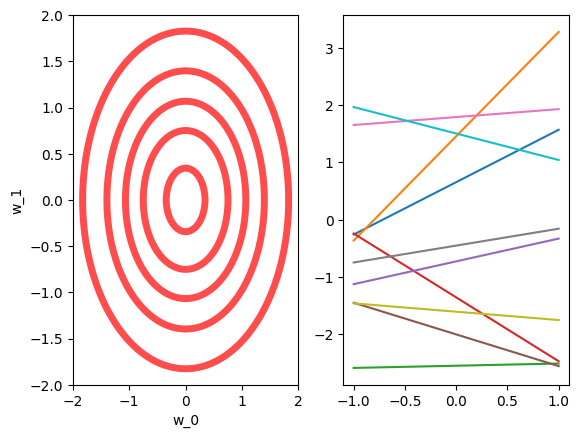

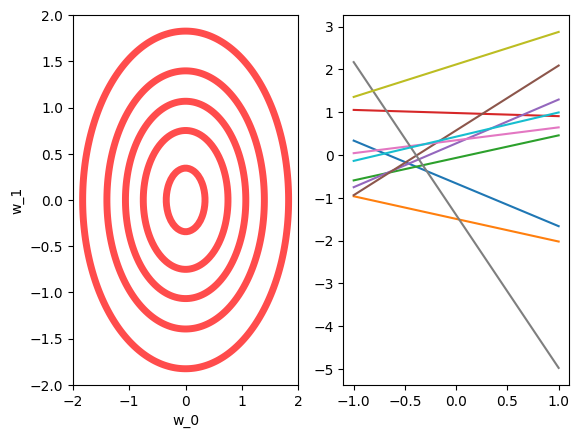

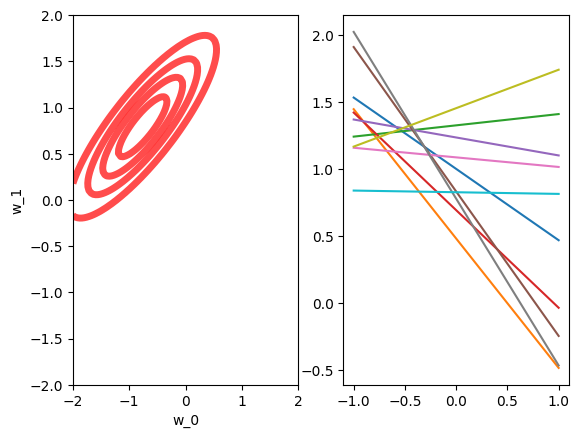

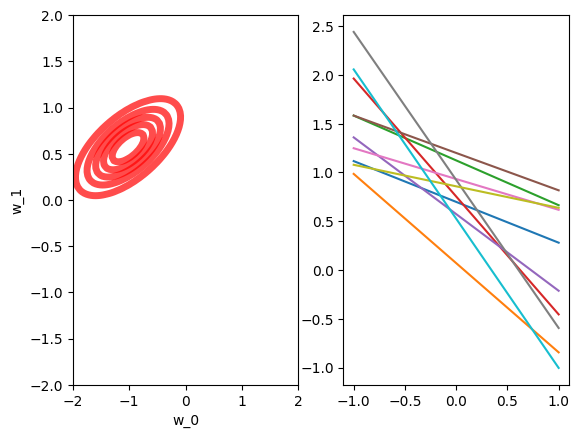

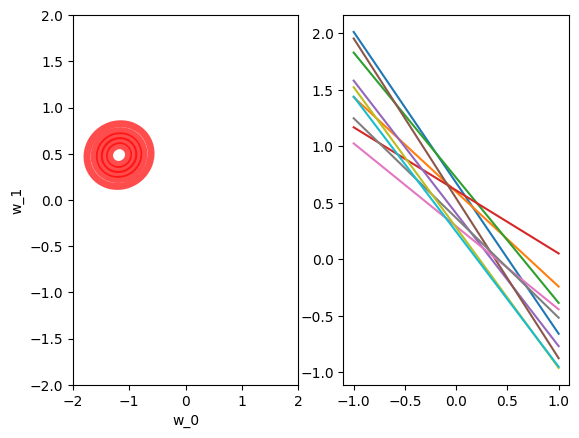

In [244]:
def plotdistribution(ax, mu, Sigma): 
    x = np.linspace(-2, 2, 100) 
    x1p, x2p = np.meshgrid(x, x)
    pos = np.vstack((x1p.flatten(), x2p.flatten())).T 

    pdf = multivariate_normal(mu.flatten(), Sigma)
    Z = pdf.pdf(pos) 
    Z = Z.reshape(100, 100) 
    ax.contour(x1p, x2p, Z, 5, colors='r', linewidths=5, alpha=0.7)

    ax.set_xlabel('w_0')
    ax.set_ylabel('w_1')

    return

def plot_line(ax, X, w): 

    y = w.dot(X.T)
    ax.plot(X[:,0], y)

def posterior(w_0, tau, X, y): 
    
    gramm_matrix = X.T @ X 
    correlation = X.T @ y 

    S_0 = np.linalg.inv(tau)
    S_0_w_0 = S_0 @ w_0

    sigma_post = np.linalg.inv(S_0 + gramm_matrix)
    mu_post = sigma_post @ (S_0_w_0 + correlation)   


    return mu_post, sigma_post

def predictive_posterior(w_0, tau, beta, X, y, x_star): 
    
    mN, SN = posterior(w_0, tau, X, y)
    m_star = mN.T @ x_star 
    S_star = (1 / beta) + (x_star.T @ SN @ x_star) 

    return m_star, S_star 


fig, axe = plt.subplots(1, 2) 
plotdistribution(axe[0], w_0, tau)
for p_samp in prior: 
    plot_line(axe[1], X, p_samp)


for i in range(X.shape[0]):
    if i % 10 != 0: 
        continue 
    mu_post, sigma_post = posterior(w_0, tau, X[:i], y[:i])
    
    posterior_samples = np.random.multivariate_normal(mu_post, sigma_post, size=10)


    fig, axe = plt.subplots(1, 2) 
    plotdistribution(axe[0], mu_post, sigma_post)
    for w_samp in posterior_samples: 
        plot_line(axe[1], X, w_samp)
    


In [245]:
x_new = np.linspace(-3, 3, 100)
x_new = np.vstack([x_new, np.ones(x_new.shape)]).T 

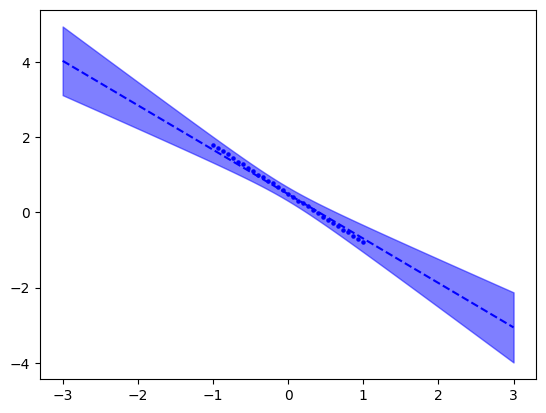

In [246]:
mean_pred = x_new @ mu_post
var_pred = np.sum(x_new @ sigma_post * x_new, axis=1)
fig, ax = plt.subplots()
std_pred = np.sqrt(var_pred)
upper_bound = mean_pred + std_pred
lower_bound = mean_pred - std_pred

ax.plot(x_new[:,0], mean_pred, 'b--', label='predictive mean')
ax.fill_between(x_new[:,0], lower_bound, upper_bound, color='blue', alpha=0.5)

ax.scatter(X[:,0], y, color='blue', s=5)

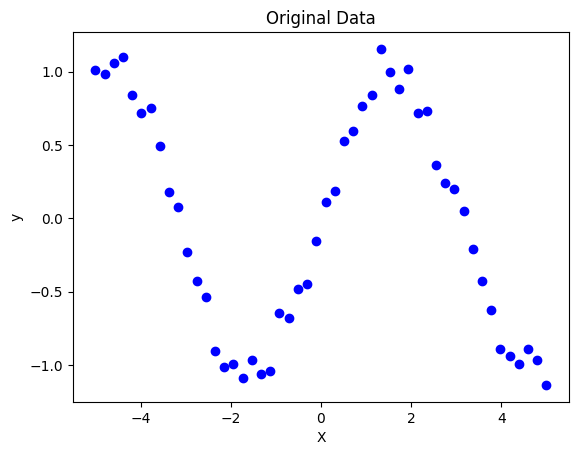

In [353]:
np.random.seed(42) 

X = np.linspace(-5, 5, 50) 

y= np.sin(X) + 0.1 * np.random.randn(50) 

plt.scatter(X, y, color='Blue')
plt.title("Original Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [355]:
from sklearn.linear_model import LinearRegression


In [356]:
X_transformed = transform_X(X, centers, s)

In [359]:
model = LinearRegression()
model.fit(X_transformed, y) 

y_pred = model.predict(X_transformed)

array([ 0.43811944,  0.61037111, -0.53941289, -0.88310778, -0.42399825,
        0.09528465,  0.82608433, -0.142023  , -0.36454161, -1.09083961])

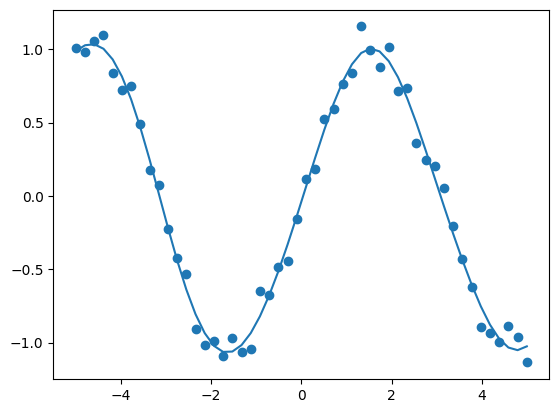

In [358]:
plt.scatter(X, y)
plt.plot(X, y_pred)